# WeatherPy
----


In [3]:
!pip install citipy

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
#import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [31]:
# Import API key
from api_keys import weather_api_key

In [32]:
weather_api_key

'763f6bd990dc39a4f3303dd89b705ec1'

# Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
#api_key = '763f6bd990dc39a4f3303dd89b705ec1'

'dd00c3f6b1bff1e30f23d26dccaf525b'

In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

In [18]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd00c3f6b1bff1e30f23d26dccaf525b'

In [20]:
# Create empty lists
city_name = []
city_lats = []
city_lngs = []
city_temp = []
city_maxtemps = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date = []

# Initialize count variables
item = 1
batch = 1

# Print header
print("Beginning Data Retrieval")
print("----------------------------")

# For loop go through the list of cities and perform a request for data on each city
for city in cities:
    
    # Build query url with city name
    query_url = url + "&q=" + city.replace(" ","+")
    
    # Get answer as json
    #data = requests.get(query_url).json()
    
    # Retrieve required data into lists 
    try:
        print(f"Processing Record {item} of Set {batch} | {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lats.append(data["coord"]["lat"])
        city_lngs.append(data["coord"]["lon"])    
        city_temp.append(data["main"]["temp"])
        city_maxtemps.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudiness.append(data["clouds"]["all"])
        city_windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        
        # Increase item count by 1
        item += 1
        
        # If statement to limit API calls to 50 using time.sleep (openweathermap API limits calls to 60/minute) ---
        if item > 50:
            # Start a new set of items
            batch += 1
            # Reset item count to 1 for next set
            item = 1
            
            # Delay the execution to stay within the limits of the API query ---
            time.sleep(60)
    # Using exception handling
    except:
        print(f"City '{city}' not found. Skipping...")

# Print completion
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | klyuchi
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | kerema
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | misratah
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | taolanaro
City 'taolanaro' not found. Skipping...
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | teloloapan
Processing Record 21 of Set 1 | albany
Processing R

Processing Record 18 of Set 4 | pangnirtung
Processing Record 19 of Set 4 | pisco
Processing Record 20 of Set 4 | villa maria
Processing Record 21 of Set 4 | usinsk
Processing Record 22 of Set 4 | kargapolye
City 'kargapolye' not found. Skipping...
Processing Record 22 of Set 4 | bengkulu
Processing Record 23 of Set 4 | punta
Processing Record 24 of Set 4 | ekhabi
Processing Record 25 of Set 4 | vardo
Processing Record 26 of Set 4 | labuhan
Processing Record 27 of Set 4 | morris
Processing Record 28 of Set 4 | lixourion
Processing Record 29 of Set 4 | alofi
Processing Record 30 of Set 4 | xghajra
City 'xghajra' not found. Skipping...
Processing Record 30 of Set 4 | vanavara
Processing Record 31 of Set 4 | buraydah
Processing Record 32 of Set 4 | domat
Processing Record 33 of Set 4 | mozarlandia
Processing Record 34 of Set 4 | rochegda
Processing Record 35 of Set 4 | komsomolskiy
Processing Record 36 of Set 4 | hihifo
City 'hihifo' not found. Skipping...
Processing Record 36 of Set 4 | 

Processing Record 34 of Set 7 | paso de los toros
Processing Record 35 of Set 7 | freeport
Processing Record 36 of Set 7 | batagay
Processing Record 37 of Set 7 | norman wells
Processing Record 38 of Set 7 | lagunas
Processing Record 39 of Set 7 | sao raimundo nonato
Processing Record 40 of Set 7 | sorvag
City 'sorvag' not found. Skipping...
Processing Record 40 of Set 7 | sambava
Processing Record 41 of Set 7 | sahuaripa
Processing Record 42 of Set 7 | yulara
Processing Record 43 of Set 7 | dakar
Processing Record 44 of Set 7 | labrea
Processing Record 45 of Set 7 | parras
City 'parras' not found. Skipping...
Processing Record 45 of Set 7 | tura
Processing Record 46 of Set 7 | consdorf
Processing Record 47 of Set 7 | chapais
Processing Record 48 of Set 7 | kemijarvi
Processing Record 49 of Set 7 | khatanga
Processing Record 50 of Set 7 | sabzevar
Processing Record 1 of Set 8 | takoradi
Processing Record 2 of Set 8 | guerrero negro
Processing Record 3 of Set 8 | rovaniemi
Processing Re

Processing Record 49 of Set 10 | muravlenko
Processing Record 50 of Set 10 | san patricio
Processing Record 1 of Set 11 | sakaiminato
Processing Record 2 of Set 11 | volginskiy
City 'volginskiy' not found. Skipping...
Processing Record 2 of Set 11 | bahir dar
Processing Record 3 of Set 11 | hofn
Processing Record 4 of Set 11 | awash
Processing Record 5 of Set 11 | nalut
Processing Record 6 of Set 11 | ayan
Processing Record 7 of Set 11 | sulangan
Processing Record 8 of Set 11 | san policarpo
Processing Record 9 of Set 11 | lompoc
Processing Record 10 of Set 11 | enkoping
Processing Record 11 of Set 11 | naze
Processing Record 12 of Set 11 | isangel
Processing Record 13 of Set 11 | kathu
Processing Record 14 of Set 11 | tupa
Processing Record 15 of Set 11 | saurimo
Processing Record 16 of Set 11 | ca mau
Processing Record 17 of Set 11 | kenora
Processing Record 18 of Set 11 | rehoboth
Processing Record 19 of Set 11 | general roca
Processing Record 20 of Set 11 | oranienburg
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
# Create a dataframe
cities_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": date,
                                "Lat": city_lats,
                                "Lng": city_lngs,
                                "Max Temp (F)": city_maxtemps,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudiness,
                                "Wind Speed (mph)": city_windspeed,
                                })

# pd.to_datetime
cities_df["Date"] = pd.to_datetime(cities_df["Date"], unit = "s")


# --- display the dataframe ---
cities_df

NameError: name 'pd' is not defined

In [33]:
# Save the dataframe to .csv file
cities_df.to_csv("cities_results.csv", index=True, index_label="Index", header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
df = pd.read_csv("cities_results.csv").set_index('Index')

In [6]:
df

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
Index,,,,,,,,,
0,Talnakh,RU,2020-12-15 18:05:15,69.49,88.40,-11.20,76,75,13.42
1,Qaanaaq,GL,2020-12-15 18:05:15,77.48,-69.36,-1.70,64,0,8.52
2,Klyuchi,RU,2020-12-15 18:05:15,52.27,79.17,4.53,94,95,8.08
3,Chui,UY,2020-12-15 18:05:15,-33.70,-53.46,78.03,42,0,13.04
4,Kerema,PG,2020-12-15 18:05:15,-7.96,145.78,77.56,82,100,3.80
...,...,...,...,...,...,...,...,...,...
562,Springdale,US,2020-12-15 18:07:06,36.19,-94.13,33.80,92,90,11.41
563,Del Rio,US,2020-12-15 18:07:06,29.36,-100.90,48.20,66,1,8.75
564,Biltine,TD,2020-12-15 18:07:07,14.53,20.92,75.16,18,11,5.79


In [8]:
#  Get the indices of cities that have humidity over 100%.
df.sort_values(by=['Humidity (%)'], ascending=False)

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
Index,,,,,,,,,
300,Miquelon,PM,2020-12-15 18:06:26,47.10,-56.38,35.60,100,75,27.51
200,Klaksvík,FO,2020-12-15 18:06:11,62.23,-6.59,44.60,100,30,11.41
345,Consdorf,LU,2020-12-15 18:06:32,49.77,6.34,46.99,100,75,5.82
185,Ansbach,DE,2020-12-15 18:02:08,49.30,10.58,44.60,100,75,4.70
252,Alyangula,AU,2020-12-15 18:06:19,-13.85,136.42,78.80,100,100,3.36
...,...,...,...,...,...,...,...,...,...
564,Biltine,TD,2020-12-15 18:07:07,14.53,20.92,75.16,18,11,5.79
327,Kédougou,SN,2020-12-15 18:06:30,12.56,-12.17,93.13,17,3,2.39
169,Villa María,AR,2020-12-15 18:03:50,-32.41,-63.24,90.07,14,0,12.06


In [12]:
df[df['Humidity (%)'] == 100]

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
Index,,,,,,,,,
62,Clarence Town,AU,2020-12-15 18:05:27,-32.58,151.78,72.00,100,90,6.93
77,Vändra,EE,2020-12-15 18:05:29,58.65,25.04,34.00,100,100,1.99
99,Pabradė,LT,2020-12-15 18:05:53,55.00,25.78,30.00,100,90,12.75
136,Airai,TL,2020-12-15 18:05:59,-8.93,125.41,61.38,100,100,1.90
185,Ansbach,DE,2020-12-15 18:02:08,49.30,10.58,44.60,100,75,4.70
197,Torbay,CA,2020-12-15 18:06:09,47.67,-52.73,37.00,100,90,19.46
200,Klaksvík,FO,2020-12-15 18:06:11,62.23,-6.59,44.60,100,30,11.41
222,Nelson Bay,AU,2020-12-15 18:06:14,-32.72,152.15,72.00,100,90,6.93
252,Alyangula,AU,2020-12-15 18:06:19,-13.85,136.42,78.80,100,100,3.36


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_df = df[df['Humidity (%)'] != 100]
clean_weather_df.sort_values(by=['Humidity (%)'], ascending=False)

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
Index,,,,,,,,,
293,Khorol,UA,2020-12-15 18:06:24,49.78,33.28,31.35,99,70,9.82
303,Ustynivka,UA,2020-12-15 18:06:26,47.96,32.54,32.00,98,90,13.42
253,Anori,BR,2020-12-15 18:06:19,-3.77,-61.64,72.91,98,100,4.03
183,Rochegda,RU,2020-12-15 18:06:07,62.80,43.25,16.02,98,100,2.06
205,Raditsa-Krylovka,RU,2020-12-15 18:06:11,53.32,34.36,21.20,98,11,4.34
...,...,...,...,...,...,...,...,...,...
547,San Rafael,AR,2020-12-15 18:06:07,-34.62,-68.33,77.38,18,0,7.14
327,Kédougou,SN,2020-12-15 18:06:30,12.56,-12.17,93.13,17,3,2.39
73,Ati,TD,2020-12-15 18:05:29,13.22,18.34,83.37,14,69,9.26


In [17]:
clean_weather_df.sort_values(by=['Max Temp (F)'], ascending=False)

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
Index,,,,,,,,,
206,Tabuleiro do Norte,BR,2020-12-15 18:06:11,-5.25,-38.13,98.15,28,95,3.58
565,San Matías,BO,2020-12-15 18:07:07,-16.37,-58.40,97.63,34,95,8.99
539,Crateús,BR,2020-12-15 18:07:02,-5.18,-40.68,97.34,24,77,5.17
45,Gilbués,BR,2020-12-15 18:00:40,-9.83,-45.34,97.29,24,13,2.71
338,São Raimundo Nonato,BR,2020-12-15 18:06:31,-9.02,-42.70,95.94,26,86,5.82
...,...,...,...,...,...,...,...,...,...
348,Khatanga,RU,2020-12-15 18:06:32,71.97,102.50,-34.40,84,98,1.39
336,Norman Wells,CA,2020-12-15 18:06:31,65.28,-126.83,-34.60,73,75,3.36
241,Zhigansk,RU,2020-12-15 18:06:16,66.77,123.37,-39.03,81,99,8.52


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

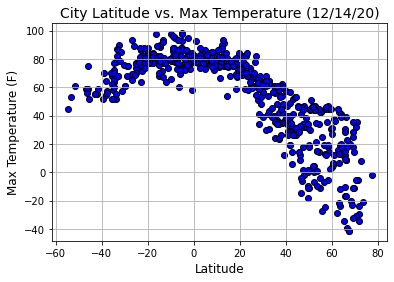

In [22]:
# Scatter plot lat vs temp

plt.scatter(clean_weather_df['Lat'], clean_weather_df['Max Temp (F)'], marker="o", facecolors="blue", edgecolors="black")

# Titles
plt.title("City Latitude vs. Max Temperature (12/14/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display
#plt.savefig("../Images/latitude-vs-temp.png")
plt.show()

## Latitude vs. Humidity Plot

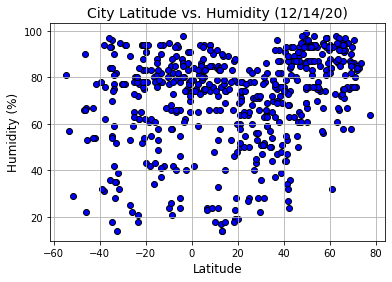

In [23]:
# Scatter plot latitude vs humidity
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Humidity (%)'], marker="o", facecolors="blue", edgecolors="black")

# Titles
plt.title("City Latitude vs. Humidity (12/14/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

#Display
#plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

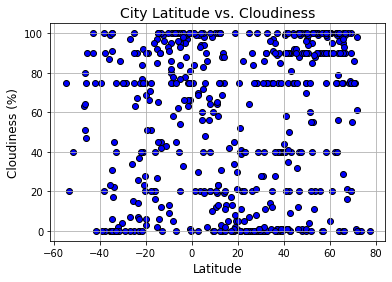

In [24]:
# Scatter plot lat vs cloudiness ---
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Cloudiness (%)'], marker="o", facecolors="blue", edgecolors="black")

# Titles
plt.title("City Latitude vs. Cloudiness", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display
#plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

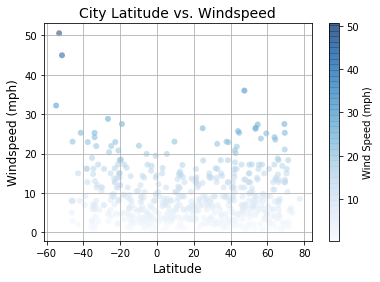

In [31]:
# Scatter plot lat vs wind speed ---
wind = clean_weather_df['Wind Speed (mph)']
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Wind Speed (mph)'], 
            c=wind, cmap='Blues',linewidth=0, alpha=0.5)
            #            marker="o", facecolors="blue", edgecolors="black")

# Titles
plt.title("City Latitude vs. Windspeed", fontsize=14)
plt.ylabel("Windspeed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.colorbar(label='Wind Speed (mph)')
plt.grid()

# Display
#plt.savefig("../Images/latitude-vs-windspeed.png")
plt.show()

## Linear Regression

In [32]:
# Function Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
# Dataframe for Northern Hemisphere cities
northtemp_df = df[df['Lat'] >= 0]
northtemp_df.sort_values(by=['Lat'])


,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
Index,,,,,,,,,
149,Muisne,EC,2020-12-15 18:06:01,0.60,-80.03,82.40,74,75,10.29
116,Ternate,ID,2020-12-15 18:05:56,0.80,127.40,80.55,79,100,12.24
492,Amapá,BR,2020-12-15 18:06:54,1.00,-52.00,92.66,42,84,4.83
400,Pemangkat,ID,2020-12-15 18:06:41,1.17,108.97,77.81,84,100,2.80
296,Bairiki Village,KI,2020-12-15 18:06:24,1.33,172.98,80.60,74,20,9.17
...,...,...,...,...,...,...,...,...,...
85,Saskylakh,RU,2020-12-15 18:05:30,71.92,114.08,-29.43,83,61,5.55
348,Khatanga,RU,2020-12-15 18:06:32,71.97,102.50,-34.40,84,98,1.39
69,Upernavik,GL,2020-12-15 18:05:28,72.79,-56.15,7.93,84,0,6.15


The r-squared is: 0.7222595689286262


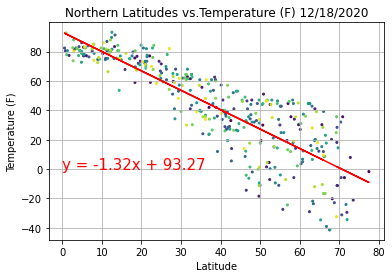

In [45]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# Number of cities in cleaned northern hemisphere dataframe
n1 = len(northtemp_df. index)

n= np.arange(n1)  # Color scale matched with number of data points
plt.scatter(northtemp_df['Lat'], northtemp_df['Max Temp (F)'], s=4, c=n)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Northern Latitudes vs.Temperature (F) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Regression Line
x_values = northtemp_df['Lat']
y_values = northtemp_df['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Save the figure
#plt.savefig('N Latitude vs.Temperature.png')

plt.show()

In [46]:
print('For every unit of change in latitude the temperature drops ' + str(round(slope,2)) +' units.') 
print('Approximately '+ str(round(rvalue**2,2)*100) + '% of the data fit into the model.')

For every unit of change in latitude the temperature drops -1.32 units.
Approximately 72.0% of the data fit into the model.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
# Dataframe for Southern Hemisphere cities
south_df = df[df['Lat'] <= 0]
south_df.sort_values(by=['Lat'])

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
Index,,,,,,,,,
35,Ushuaia,AR,2020-12-15 18:01:01,-54.80,-68.30,44.60,81,75,32.21
47,Punta Arenas,CL,2020-12-15 18:05:23,-53.15,-70.92,53.01,57,20,50.55
320,Río Gallegos,AR,2020-12-15 18:06:04,-51.62,-69.22,60.80,29,40,44.96
27,Bluff,NZ,2020-12-15 18:05:19,-46.60,168.33,59.00,66,63,8.01
126,Kaitangata,NZ,2020-12-15 18:05:57,-46.28,169.85,55.99,90,64,5.01
...,...,...,...,...,...,...,...,...,...
58,Puerto Ayora,EC,2020-12-15 18:03:32,-0.74,-90.35,78.80,65,75,19.46
273,Port-Gentil,GA,2020-12-15 18:06:22,-0.72,8.78,82.40,78,75,13.87
132,Salinópolis,BR,2020-12-15 18:05:58,-0.61,-47.36,84.06,72,66,9.80


The r-squared is: 0.37953234686165166


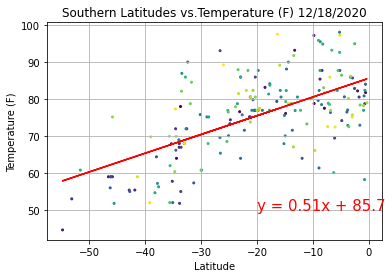

In [75]:
# Number of cities in cleaned southern hemisphere dataframe
n2 = len(south_df. index)
n3= np.arange(n2)  # Color scale matched with number of data points
plt.scatter(south_df['Lat'], south_df['Max Temp (F)'], s=4, c=n3)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Southern Latitudes vs.Temperature (F) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = south_df['Lat']
y_values = south_df['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")

# Save the figure
plt.savefig('S Latitude vs.Temperature Reg.png')

plt.show()

In [49]:
print('For every unit of change in latitude the temperature rises.'+ str(round(slope,2)) +' units.') 
print('Approximately '+ str(round(rvalue**2,2)*100) + '% of the data fit into the model.')

For every unit of change in latitude the temperature rises.0.51 units.
Approximately 38.0% of the data fit into the model.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.025106251568738185


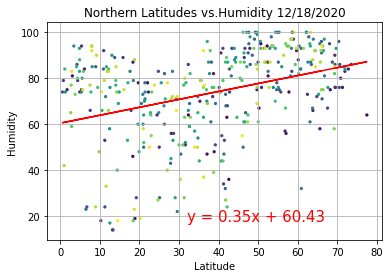

In [73]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression

# Number of cities in cleaned northern hemisphere dataframe
n1 = len(northtemp_df. index)
t= np.arange(n1)  # Color scale matched with number of data points
plt.scatter(northtemp_df['Lat'], northtemp_df['Humidity (%)'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Latitudes vs.Humidity {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = northtemp_df['Lat']
y_values = northtemp_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(32,18),fontsize=15,color="red")

# Save the figure
plt.savefig('N Latitude vs.Humidity Reg.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05765848496045658


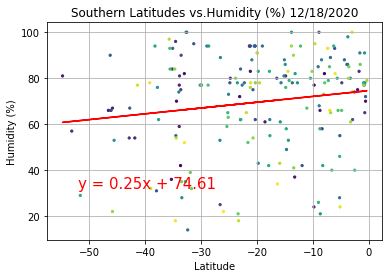

In [72]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression
# Number of cities in cleaned southern hemisphere dataframe
n2 = len(south_df. index)
t= np.arange(n2)  # Color scale matched with number of data points
plt.scatter(south_df['Lat'], south_df['Humidity (%)'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Latitudes vs.Humidity (%) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = south_df['Lat']
y_values = south_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,32),fontsize=15,color="red")

# Save the figure
plt.savefig('S Latitude vs.Humidity Reg.png')

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08977341706371454


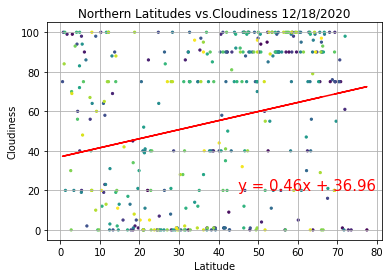

In [71]:
# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
# Number of cities in cleaned northern hemisphere dataframe
n1 = len(northtemp_df. index)
t= np.arange(n1)  # Color scale matched with number of data points
plt.scatter(northtemp_df['Lat'], northtemp_df['Cloudiness (%)'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Latitudes vs.Cloudiness {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = northtemp_df['Lat']
y_values = northtemp_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

# Save the figure
#plt.savefig('N Latitude vs.Cloudiness Reg.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08977341706371454


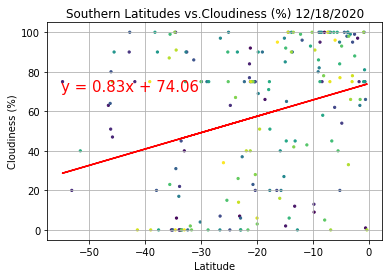

In [70]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Number of cities in cleaned southern hemisphere dataframe
n2 = len(south_df. index)
t= np.arange(n2)  # Color scale matched with number of data points
plt.scatter(south_df['Lat'], south_df['Cloudiness (%)'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Latitudes vs.Cloudiness (%) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = south_df['Lat']
y_values = south_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")

# Save the figure
plt.savefig('S Latitude vs.Cloudiness Reg.png')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015763997718623263


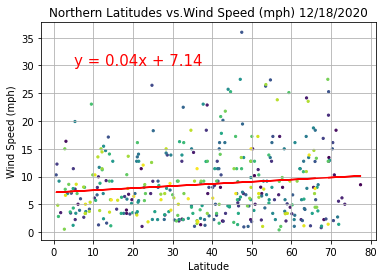

In [68]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
# Number of cities in cleaned northern hemisphere dataframe
n1 = len(northtemp_df. index)
t= np.arange(n1)  # Color scale matched with number of data points
plt.scatter(northtemp_df['Lat'], northtemp_df['Wind Speed (mph)'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Latitudes vs.Wind Speed (mph) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = northtemp_df['Lat']
y_values = northtemp_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")

# Save the figure
#plt.savefig('N Latitude vs.Wind Speed Reg.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12507863890321025


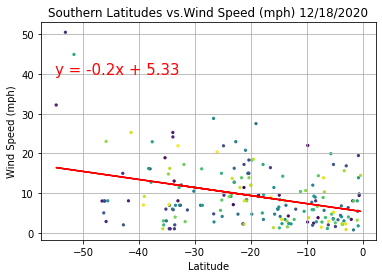

In [66]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Number of cities in cleaned southern hemisphere dataframe
n2 = len(south_df. index)
t= np.arange(n2)  # Color scale matched with number of data points
plt.scatter(south_df['Lat'], south_df['Wind Speed (mph)'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Latitudes vs.Wind Speed (mph) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = south_df['Lat']
y_values = south_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")

# Save the figure
#plt.savefig('S Latitude vs.Wind Speed Reg.png')

plt.show()